In [1]:
#library used for data preprocessing
import pandas as pd

#matplotlib is a plotting library for the python programming language and its numerical mathematics extension NumPy
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

#Plotly provides online graphing,analytics and statistics tools for individuals and collaboration
#as well as scientific graphing libraraies for python
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=24,12


#Cufflinks connect plotly with pandas to create graphs and charts of Dataframe directly
import cufflinks as cf
pyo.init_notebook_mode(connected=True)
cf.go_offline()


#Folium is a powerful data visualization library in python that was buit primarily to help people visualize geospatial data
import folium

In [2]:
#Read TAMIL NADU Covid-19 (csv file) cases--confirm,deaths,recovery and active cases

TN=pd.read_csv(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\districtwise_cases_tn.csv")
TN.style.background_gradient(cmap='seismic')

,S.No,District,confirm,Deaths,Recovery,Active Cases
0,1,Ariyalur,60,8,30,22
1,2,Chengalpattu,40,4,22,14
2,3,Chennai,131,20,22,89
3,4,Coimbatore,80,10,33,37
4,5,Cuddalore,78,9,29,40
5,6,Dharmapuri,75,5,24,46
6,7,Dindigul,70,12,30,28
7,8,Erode,65,10,20,35
8,9,Kallakurichi,63,13,28,22
9,10,Kancheepuram,60,9,27,24


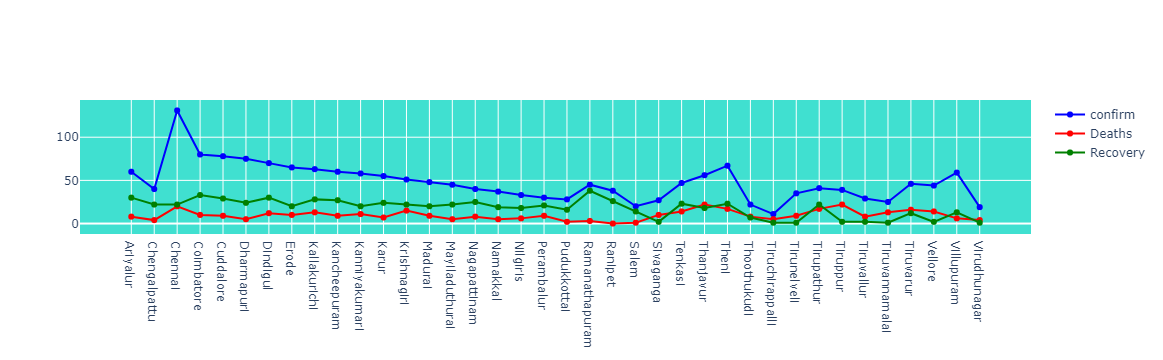

In [3]:
#LINE GRAPH

confirmed=TN.groupby('District').sum()['confirm'].reset_index()
death=TN.groupby('District').sum()['Deaths'].reset_index()
rec=TN.groupby('District').sum()['Recovery'].reset_index()


fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['District'],y=confirmed['confirm'],mode='lines+markers',name='confirm',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=death['District'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['District'],y=rec['Recovery'],mode='lines+markers',name='Recovery',line=dict(color='green',width=2))) 
fig.update_layout(plot_bgcolor='turquoise')

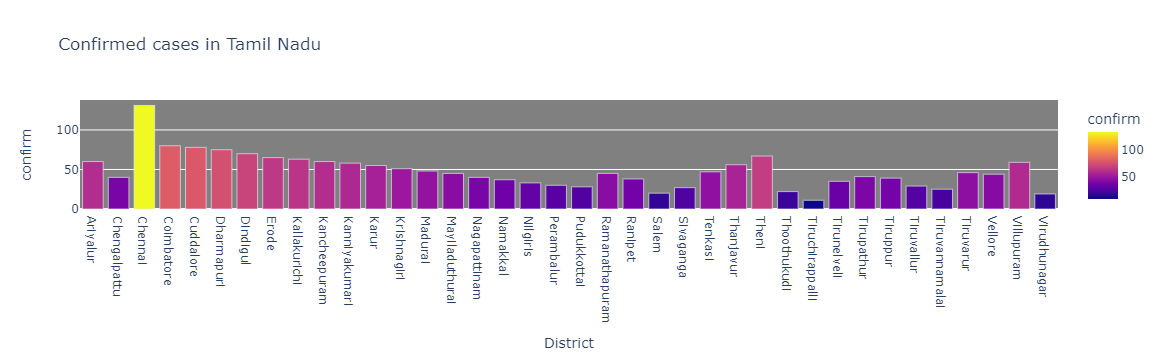

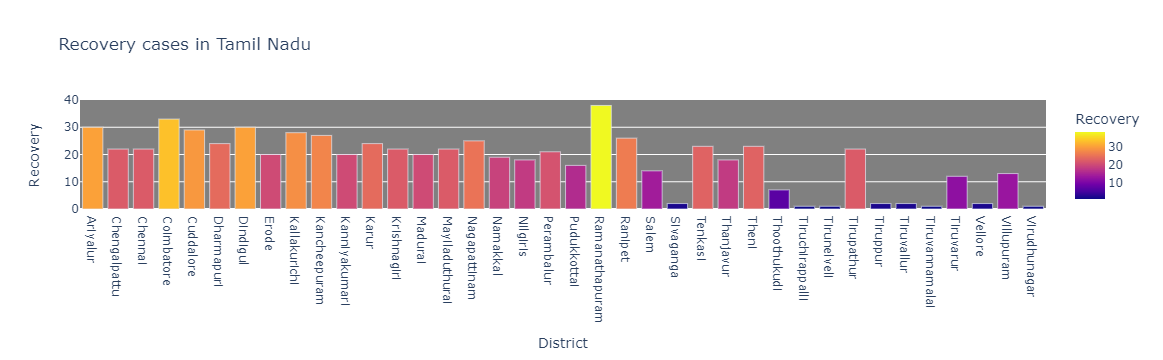

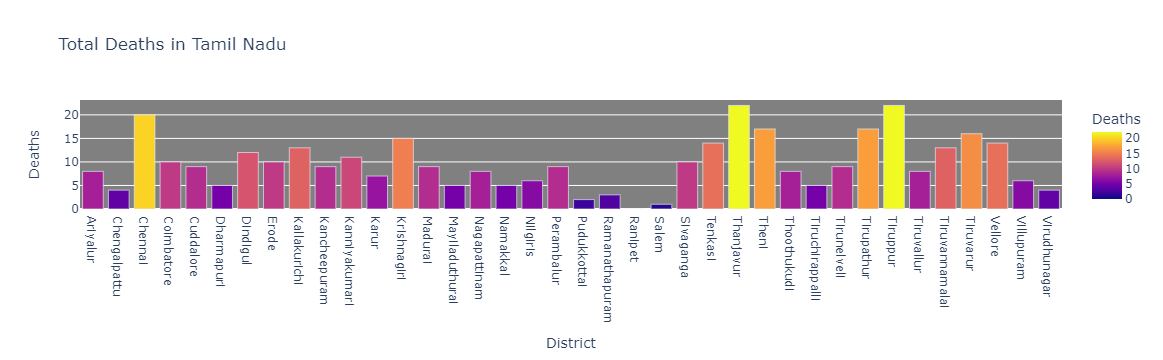

In [4]:
#BAR GRAPH

fig=px.bar(TN,x="District",y="confirm",color='confirm',title='Confirmed cases in Tamil Nadu')
fig.update_layout(plot_bgcolor='grey')
fig.show()

fig=px.bar(TN,x="District",y="Recovery",color='Recovery',title='Recovery cases in Tamil Nadu')
fig.update_layout(plot_bgcolor='gray')
fig.show()

fig=px.bar(TN,x="District",y="Deaths",color='Deaths',title='Total Deaths in Tamil Nadu')
fig.update_layout(plot_bgcolor='grey')
fig.show()


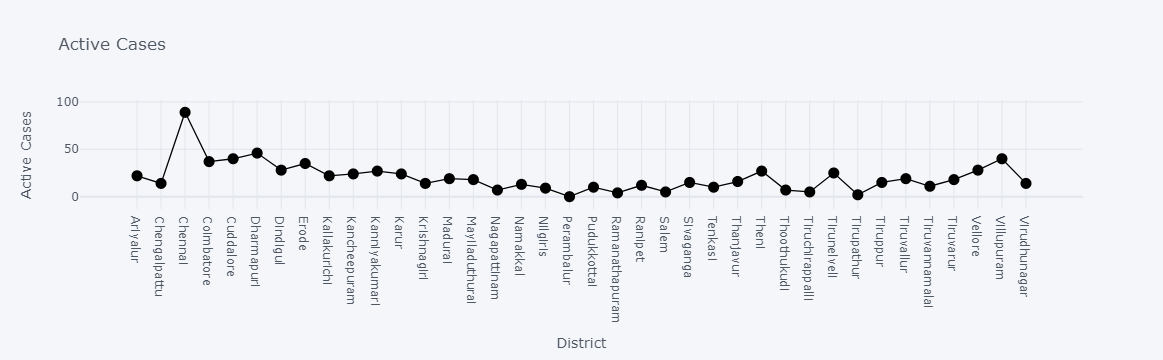

In [5]:
#LINE GRAPH -Tamil Nadu (Active Cases)

TN.iplot(kind='scatter',x='District',y='Active Cases',mode='markers+lines',title='Active Cases',xTitle='District',yTitle='Active Cases',colors='Black',size=11)


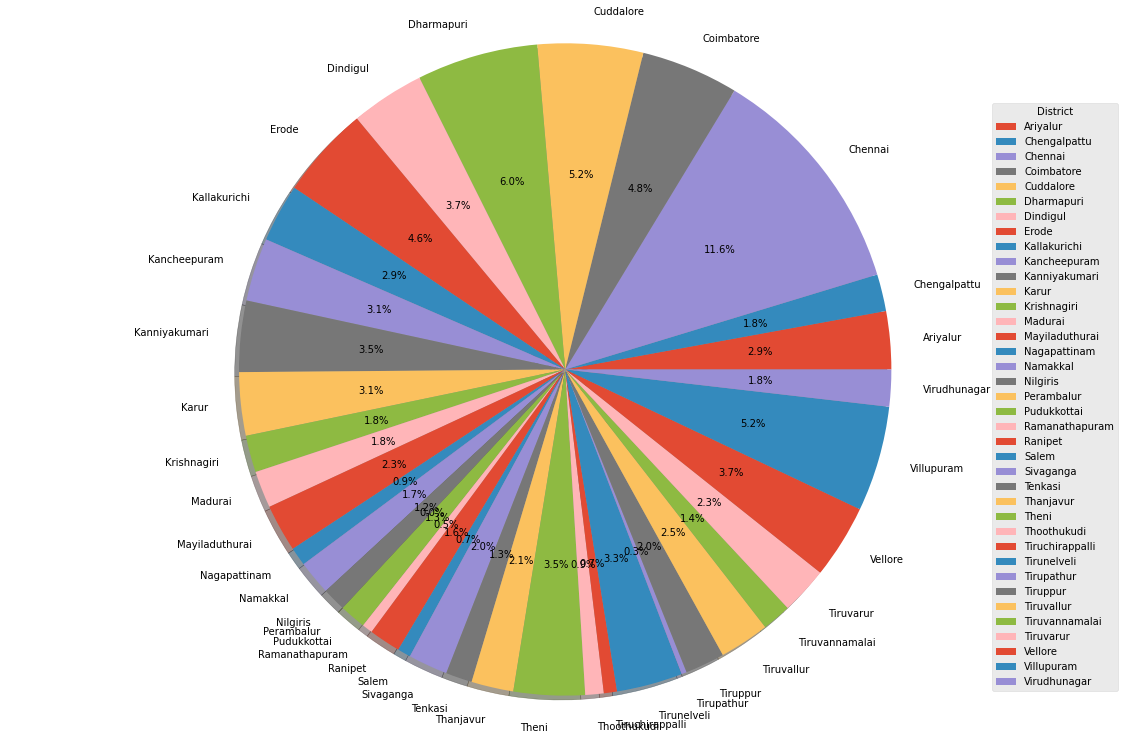

In [6]:
#pie Chart-Tamil Nadu (Active Cases)

exp_val=[22,14,89,37,40,46,28,35,22,24,27,24,14,14,18,7,13,9,0,10,4,12,5,15,10,16,27,7,5,25,2,15,19,11,18,28,40,14]
exp_labels=["Ariyalur","Chengalpattu","Chennai","Coimbatore","Cuddalore","Dharmapuri","Dindigul","Erode","Kallakurichi","Kancheepuram","Kanniyakumari","Karur","Krishnagiri","Madurai","Mayiladuthurai","Nagapattinam","Namakkal","Nilgiris","Perambalur","Pudukkottai","Ramanathapuram","Ranipet","Salem","Sivaganga","Tenkasi","Thanjavur","Theni","Thoothukudi","Tiruchirappalli","Tirunelveli","Tirupathur","Tiruppur","Tiruvallur","Tiruvannamalai","Tiruvarur","Vellore","Villupuram","Virudhunagar"]
plt.figure(figsize=(20,10))
plt.axis("equal")
plt.pie(exp_val,labels=exp_labels,radius=1.5,autopct='%0.1f%%',shadow=True)
plt.legend(title="District")
plt.show()

In [7]:
#Merge two files

TN_Cord=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\tamilnadu lat_long.xlsx")
TN_full=pd.merge(TN_Cord,TN,on='District')
TN_full.style.background_gradient(cmap='YlGnBu_r')

,District,Lat,Long,S.No,confirm,Deaths,Recovery,Active Cases
0,Ariyalur,11.152100,79.069400,1,60,8,30,22
1,Chengalpattu,12.693620,79.980500,2,40,4,22,14
2,Chennai,13.072090,80.201859,3,131,20,22,89
3,Coimbatore,11.016010,76.970310,4,80,10,33,37
4,Cuddalore,11.756640,79.762900,5,78,9,29,40
5,Dharmapuri,12.106527,78.136139,6,75,5,24,46
6,Dindigul,10.365581,77.970657,7,70,12,30,28
7,Erode,11.342423,77.728165,8,65,10,20,35
8,Kallakurichi,11.738187,78.963882,9,63,13,28,22
9,Kancheepuram,12.834174,79.703644,10,60,9,27,24


In [8]:
#Map Visualisation

map=folium.Map(location=[8,80],zoom_start=7,max_zoom=7,min_zoom=7,height=1000,width='100%',tiles='openstreetmap')

for Lat,Long,value, name in zip(TN_full['Lat'],TN_full['Long'],TN_full['Active Cases'],TN_full['District']):

    folium.CircleMarker([Lat,Long],popup=('<strong>District</strong>: '+str(name).capitalize()+'<br>''<strong>Active Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='blue').add_to(map)
map

In [9]:
#INDIA

In [10]:
#Read india covid cases csv file and calculate a number of Total cases and Active cases

IN=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\Covid cases in India.xlsx")
IN['Total Cases']=IN['Total Confirmed cases (Indian National)']+IN['Total Confirmed cases ( Foreign National )']
IN['Active Cases']=IN['Total Cases']-(IN['Death']+IN['Cured'])
IN.style.background_gradient(cmap='YlGnBu_r')


,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,1,Andhra Pradesh,12,0,1,0,12,11
1,2,Chhattisgarh,6,0,0,0,6,6
2,3,Delhi,38,1,6,1,39,32
3,4,Gujarat,43,0,0,3,43,40
4,5,Haryana,16,14,11,0,30,19
5,6,Himachal Pradesh,4,0,0,1,4,3
6,7,Karnataka,20,0,3,2,20,15
7,8,Kerala,131,7,11,0,138,127
8,9,Madhya Pradesh,23,0,0,1,23,22
9,10,Maharashtra,144,3,15,4,147,128


In [11]:
Total_Active_cases=IN.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
Total_Active_cases.style.background_gradient(cmap='YlGnBu_r')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Gujarat,40
Rajasthan,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


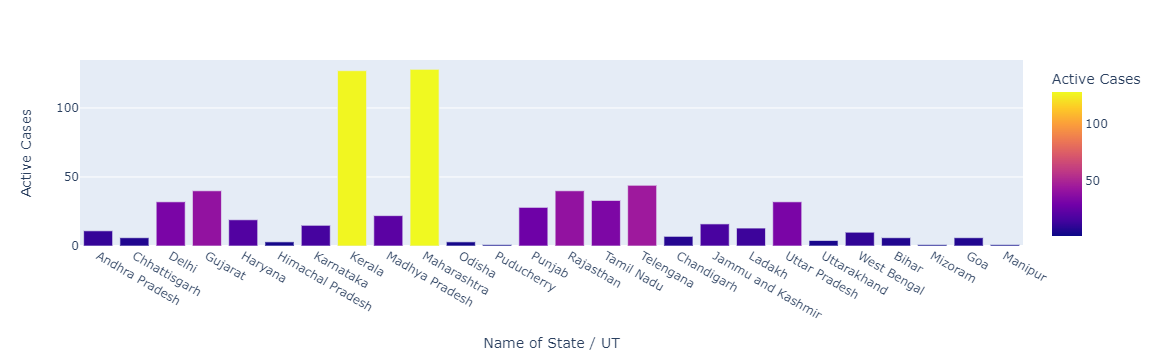

In [12]:
#Bar Graph

px.bar(IN,x='Name of State / UT',y='Active Cases',color='Active Cases')

In [13]:
#Merge Two file

Indian_Cord=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\Indian_lat_long.xlsx")
IN_full=pd.merge(Indian_Cord,IN,on='Name of State / UT')
IN_full.style.background_gradient(cmap='YlGnBu_r')

,Name of State / UT,Lat,Long,S. No.,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,16.515099,80.632095,1,12,0,1,0,12,11
1,Chhattisgarh,21.295132,81.828232,2,6,0,0,0,6,6
2,Delhi,28.644800,77.216721,3,38,1,6,1,39,32
3,Gujarat,22.309425,72.136230,4,43,0,0,3,43,40
4,Haryana,28.481216,76.040498,5,16,14,11,0,30,19
5,Himachal Pradesh,32.084206,77.571167,6,4,0,0,1,4,3
6,Karnataka,15.317277,75.713890,7,20,0,3,2,20,15
7,Kerala,9.931233,76.267303,8,131,7,11,0,138,127
8,Madhya Pradesh,26.218287,78.182831,9,23,0,0,1,23,22
9,Maharashtra,19.663280,75.300293,10,144,3,15,4,147,128


In [14]:
#Map visualitation

map=folium.Map(location=[20,70],zoom_start=7,max_zoom=7,min_zoom=6,height=1000,width='100%',tiles='cartodbpositron')

for lat,long,value, name in zip(IN_full['Lat'],IN_full['Long'],IN_full['Active Cases'],IN_full['Name of State / UT']):

    #folium.CircleMarker([lat,long],popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Active Cases</strong>: ' + str(value)+ '<br>'),color='blue',fill_color='red').add_to(map)
    folium.Marker([lat,long],popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Active Cases</strong>: ' + str(value)+ '<br>'),icon=folium.features.CustomIcon('E:\project-covid 19\covid.png',icon_size=(40,40))).add_to(map)
    
map

In [15]:
dbd_India=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")

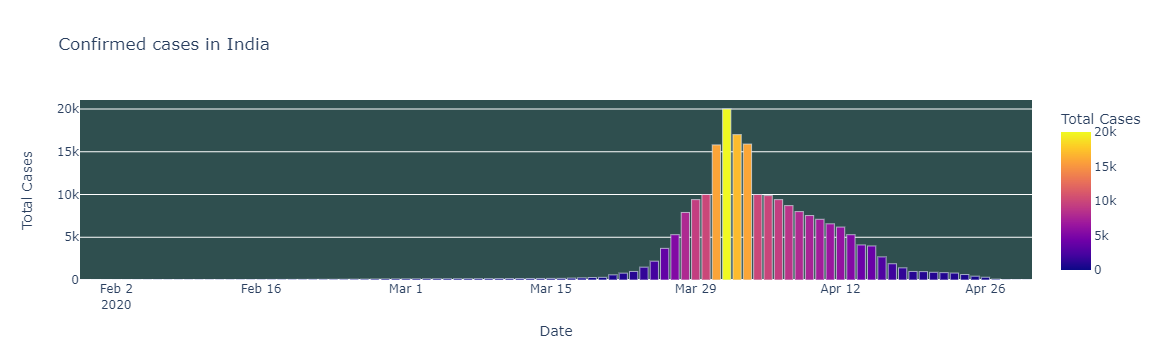

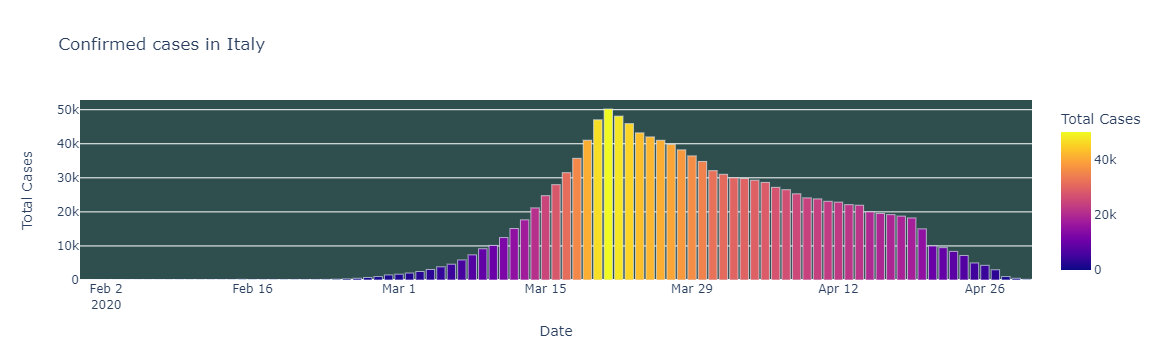

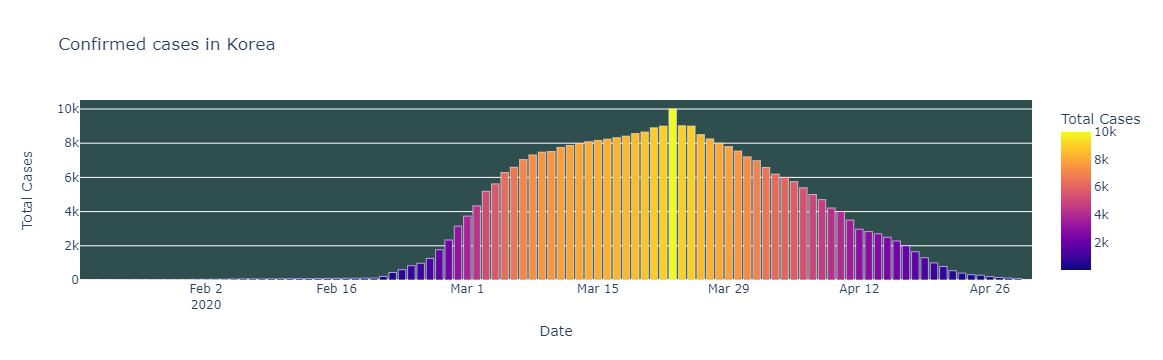

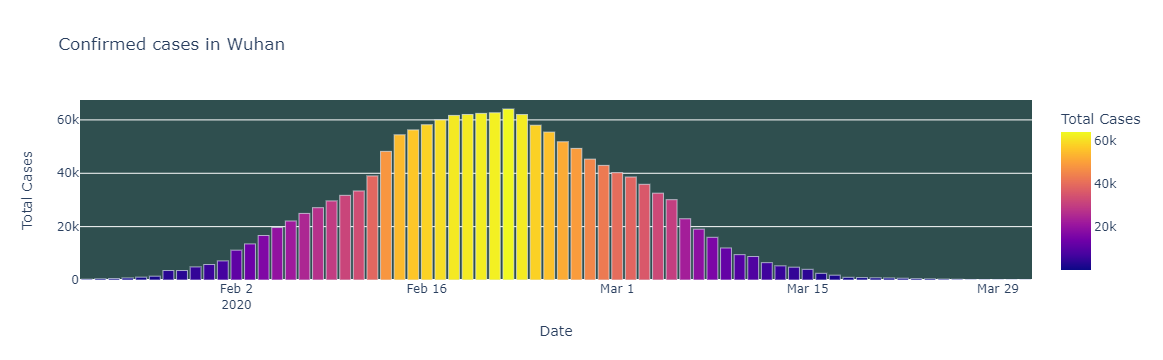

In [16]:

fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.update_layout(plot_bgcolor='darkslategrey')
fig.show()

fig=px.bar(dbd_Italy,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Italy')
fig.update_layout(plot_bgcolor='darkslategrey')
fig.show()

fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Korea')
fig.update_layout(plot_bgcolor='darkslategrey')
fig.show()

fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in Wuhan')
fig.update_layout(plot_bgcolor='darkslategrey')
fig.show()

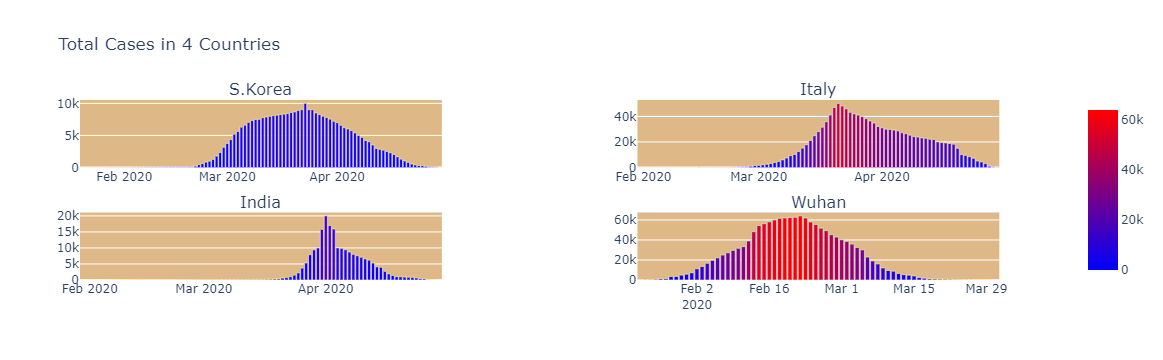

In [17]:
from plotly.subplots import make_subplots

fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)

             
fig.update_layout(coloraxis=dict(colorscale='bluered'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='burlywood')




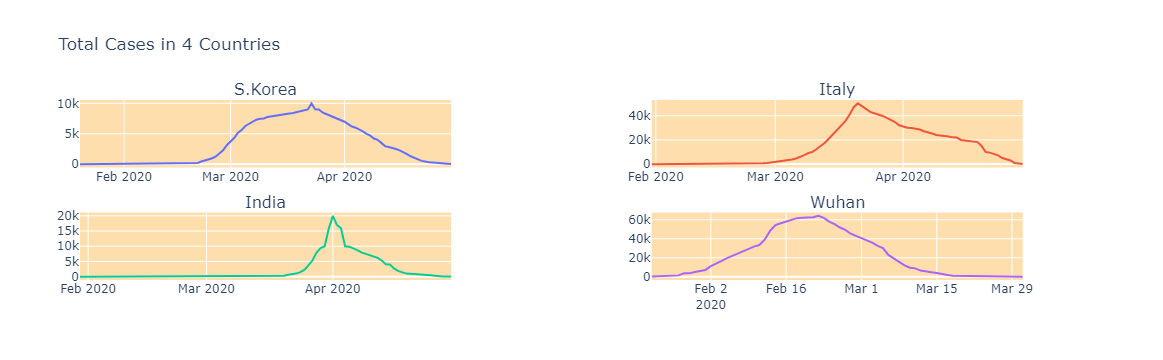

In [18]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Scatter(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='rainbow'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='navajowhite')


In [19]:
##__WORLD__##

In [20]:
df=pd.read_csv('E:\project-covid 19\COVID-19-Data-Analyisis-master\covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [21]:
df.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


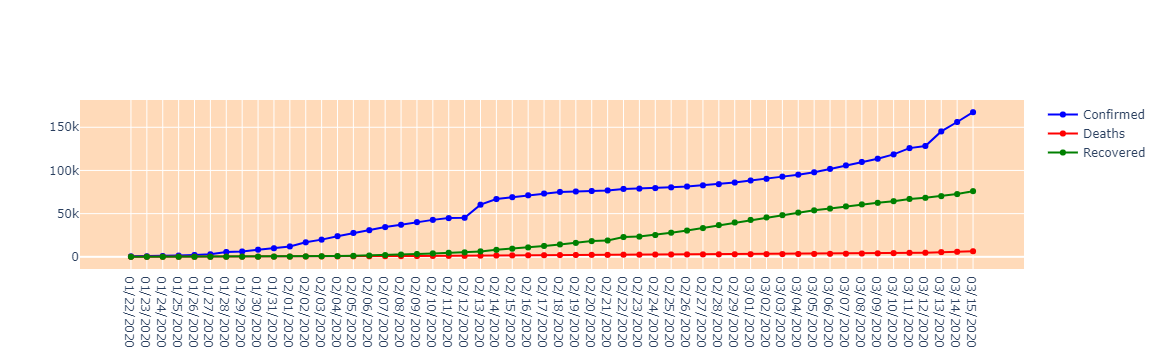

In [22]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()


###
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))
fig.update_layout(plot_bgcolor='peachpuff')

In [23]:
df_confirmed2=pd.read_csv(r'E:\project-covid 19\COVID-19-Data-Analyisis-master\country_wise_latest.csv')
df_confirmed2.rename(columns={'Country/Region':'Country'},inplace=True)
df_latlong2=pd.merge(df,df_confirmed2,on=['Country','Country'])
df_latlong2
#####

df_confirmed3=pd.read_csv(r'E:\project-covid 19\COVID-19-Data-Analyisis-master\world_country_and_usa_states_latitude_and_longitude_values.csv')
df_confirmed3.rename(columns={'country':'Country'},inplace=True)
df_latlong3=pd.merge(df_latlong2,df_confirmed3,on=['Country','Country'])
df_latlong3

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\project-covid 19\\country_wise_latest.csv'

In [ ]:
fig=px.density_mapbox(df_latlong3,lat="latitude",lon="longitude",hover_name="Country",hover_data=["Confirmed_y","Deaths_y","Recovered_y","country_code"],animation_frame="Date",color_continuous_scale="rainbow",radius=7,zoom=1,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=4)

In [ ]:
###

In [ ]:
w=pd.read_csv(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\indiana-history.csv")
w

In [ ]:
w.groupby('date').sum()

In [ ]:
hospitalized=w.groupby('date').sum()['hospitalized'].reset_index()
death=w.groupby('date').sum()['death'].reset_index()
hospitalizedCurrently=w.groupby('date').sum()['hospitalizedCurrently'].reset_index()


###
fig=go.Figure()
fig.add_trace(go.Scatter(x=hospitalized['date'],y=hospitalized['hospitalized'],mode='lines',name='hospitalized',line=dict(color='blue',width=3)))

fig.add_trace(go.Scatter(x=death['date'],y=death['death'],mode='lines',name='death',line=dict(color='red',width=3)))
fig.add_trace(go.Scatter(x=hospitalizedCurrently['date'],y=hospitalizedCurrently['hospitalizedCurrently'],mode='lines',name='hospitalizedCurrently',line=dict(color='green',width=3)))
fig.update_layout(plot_bgcolor='khaki')

In [ ]:
confirmed1=pd.read_csv(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\time_series_covid_19_confirmed.csv")
confirmed1.head()

In [ ]:
recovered1=pd.read_csv(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\time_series_covid_19_recovered.csv")
recovered1.head()

In [ ]:
death1=pd.read_csv(r"E:\project-covid 19\COVID-19-Data-Analyisis-master\time_series_covid_19_deaths.csv")
death1.head()

In [ ]:
#confirmed2 = confirmed1.drop(['Lat','Long'],axis=1,inplace=True)
recovered2 = recovered1.drop(['Lat','Long'],axis=1,inplace=True)
death2 = death1.drop(['Lat','Long'],axis=1,inplace=True)

In [ ]:
confirmed2=confirmed1.groupby('Country/Region').sum()
confirmed2.head()


In [ ]:
recovered2 = recovered1.groupby('Country/Region').sum()
recovered2.head()


In [ ]:
death2=death1.groupby('Country/Region').sum()
death2.head()

In [ ]:
cou = input("Enter a country Name:")

confirmed2.loc[cou].iplot(title='Confirmed Cases');
plt.xticks(rotation="vertical");

recovered2.loc[cou].iplot(title='Recovered Cases');#.areafigsize=(12,4)
plt.xticks(rotation="vertical");

death2.loc[cou].iplot(title='Death Cases');#.areafigsize=(12,4)
plt.xticks(rotation="vertical");